# Assignment 2 ESRB Ratings

#### Info
* Julian Boaz
* Due: 10/24/2021
* Assignment 2

---

In [1]:
# Importing libraries for data research
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset
trainData = pd.read_csv('../input/assignment2data/train.csv')
testData = pd.read_csv('../input/assignment2data/eval.csv')

---
#### Looking for missing data

In [2]:
trainDataNull = trainData.isnull().sum()
testDataNull = testData.isnull().sum()

print("Training Data Null Values: \n", trainDataNull)
print("\n")
print("Testing Data Null Values: \n", testDataNull)


Training Data Null Values: 
 id                          0
title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drug

It looks like theres no missing values which is great, now I'll look for outliers

---
#### Outliers


<AxesSubplot:>

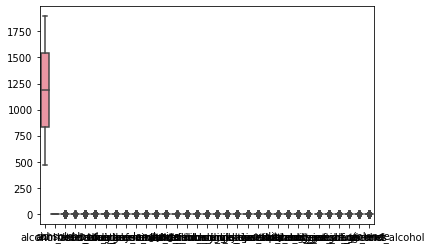

In [3]:
sns.boxplot(data=trainData)

This makes sense as all of the data is completely **categorical**, or **binary values**. The outliers will for example be something like the use of alcohol category only having 1 observation resulting in an M rating whereas it has a ton of observations supporting T and ET ratings.

---
#### Exploring data in order to determine what data will be useful for my models

It seems as if it's possible that there is some overlap for some categories, however I cannot tell whether this holds true for all values. Let's explore this.

The amount of observations:  1421


The amount of times MCV occurs:  33
The amount of times CV occurs:  27
The amount of times CV and MCV equal, CV = 1:  1
The amount of times CV and MCV equal, MCV = 1:  1


Amount of time language occurs:  156
Amount of time language occurs:  166
The amount of times SL equals L, L = 1:  23
The amount of times SL equals L, SL = 1:  23


Amount of times theres a reference to alcohol:  69
Amount of times theres a use of alcohol:  24
The amount of times a reference to alcohol equals the use of alcohol 8


Amount of times no descriptors occurs:  230


Amount of times nudity occurs:  19
Amount of times partial nudity occurs:  20
Amount of time nudity occurs with partial nudity:  0


Amount of times theres blood:  312
Amount of times theres mild blood:  97
The amount of times a reference to alcohol equals the use of alcohol 2


Amount of unique game titles:  (1421,)


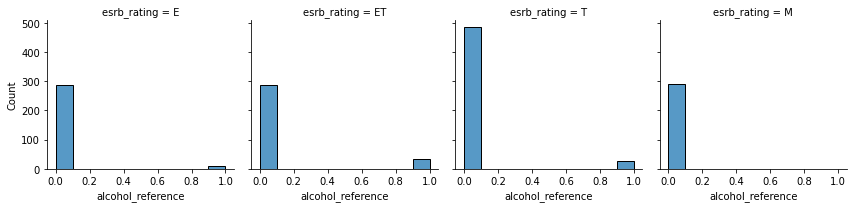

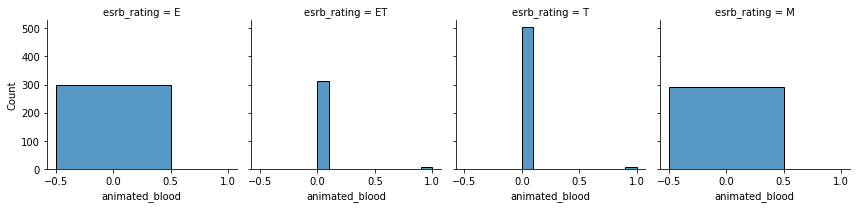

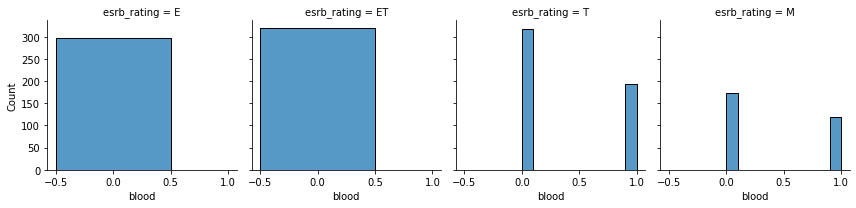

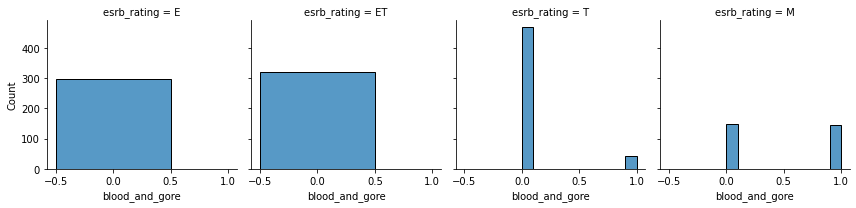

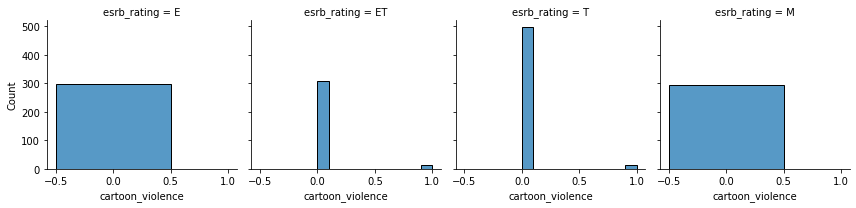

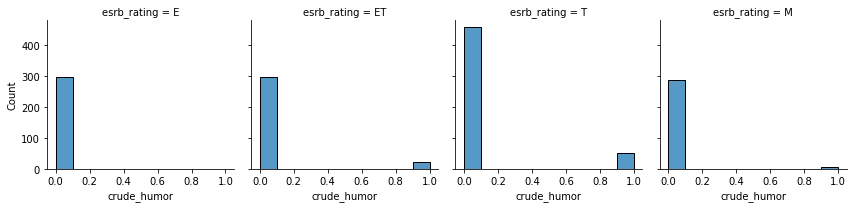

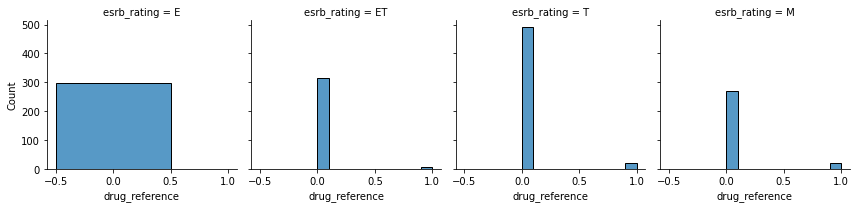

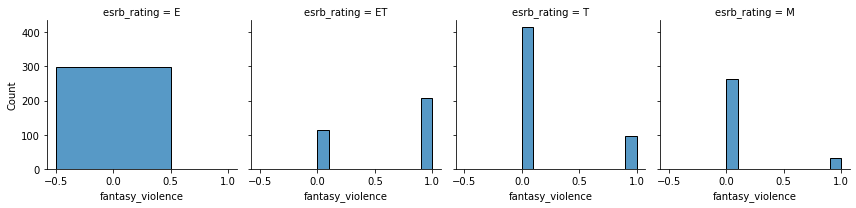

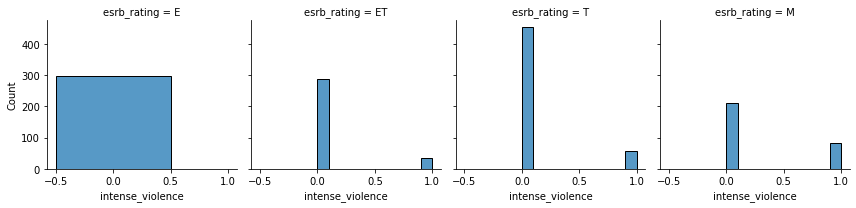

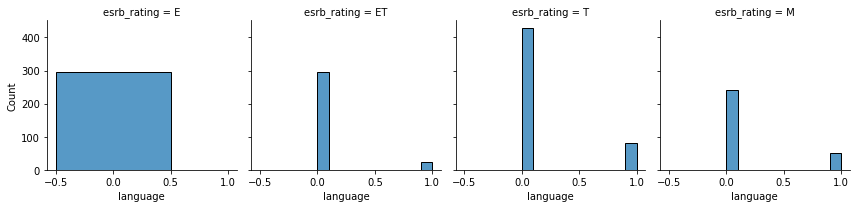

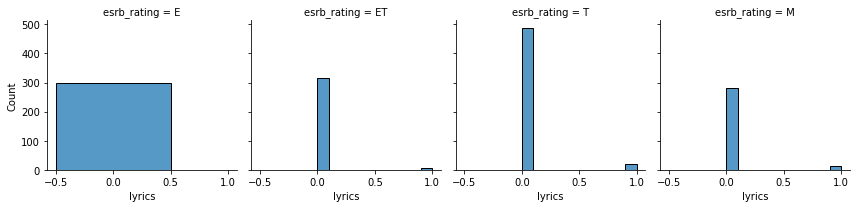

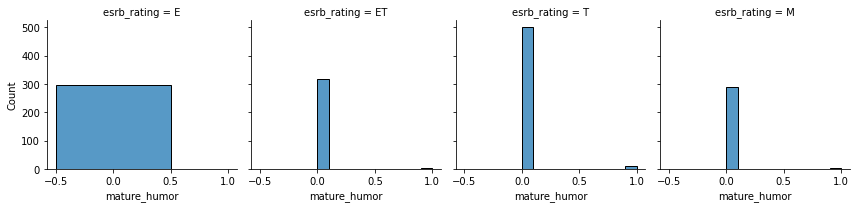

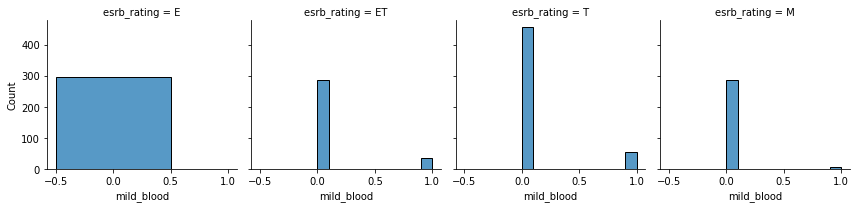

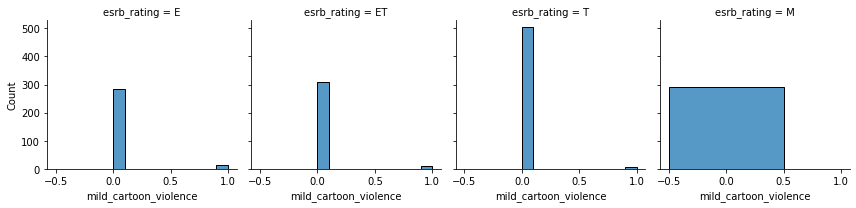

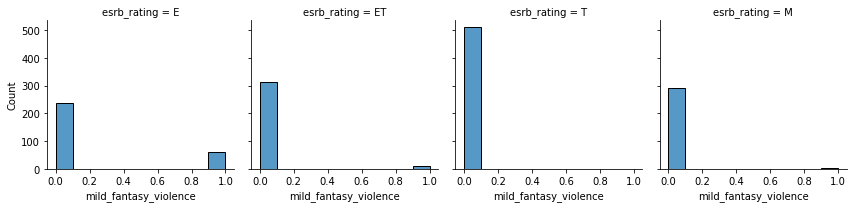

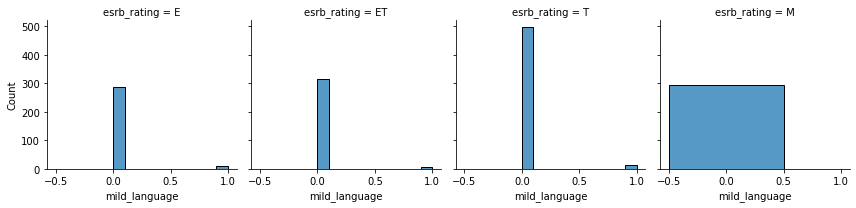

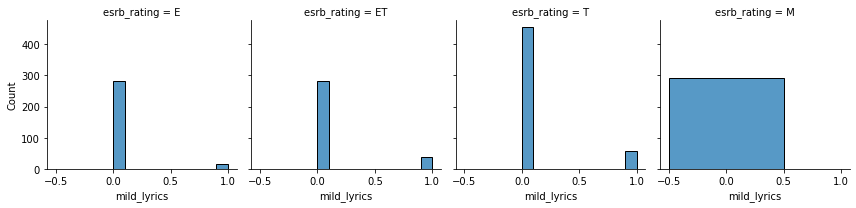

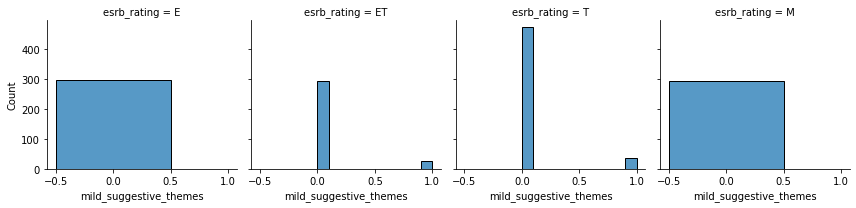

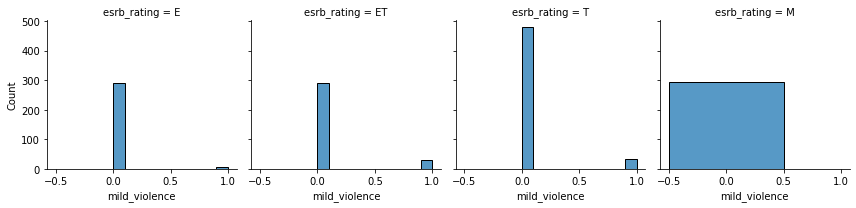

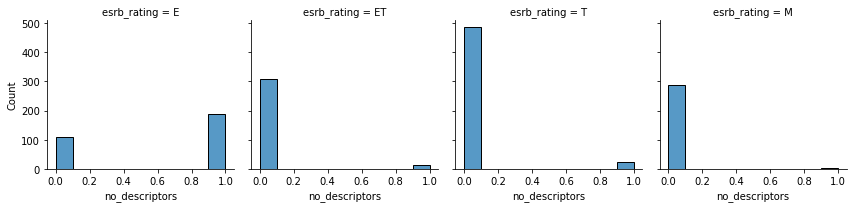

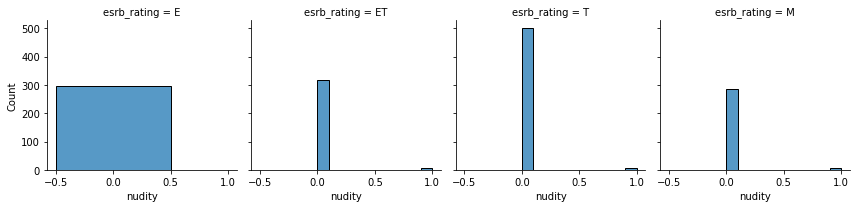

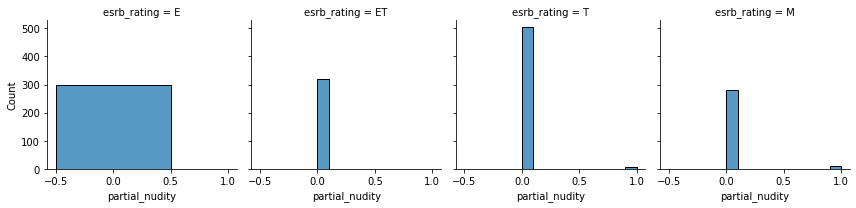

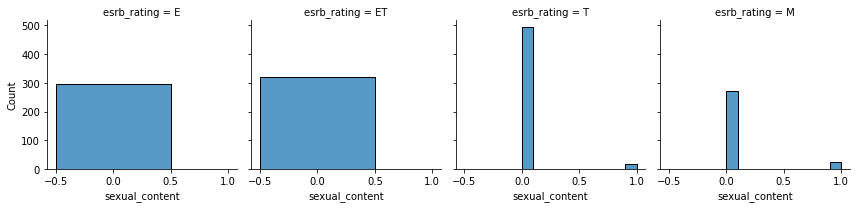

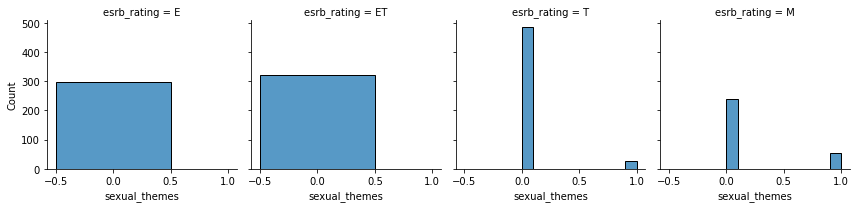

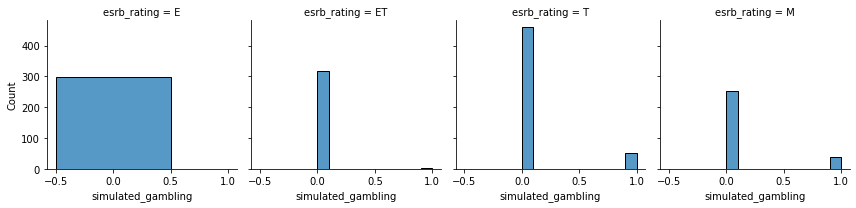

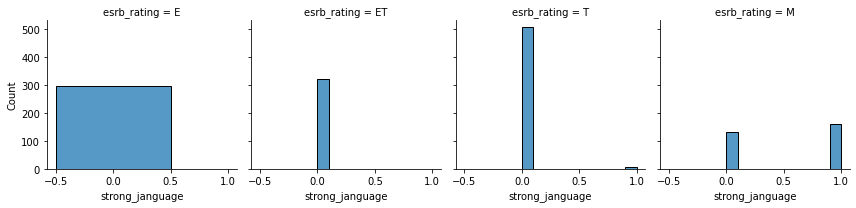

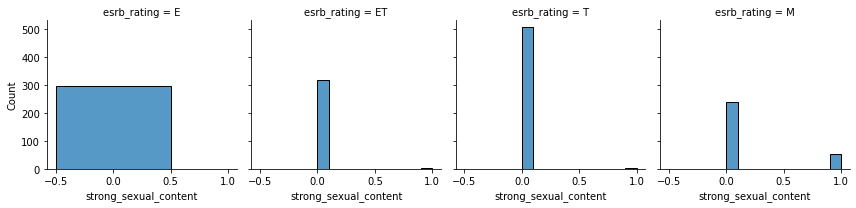

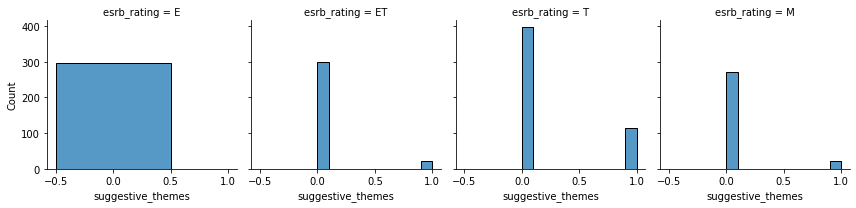

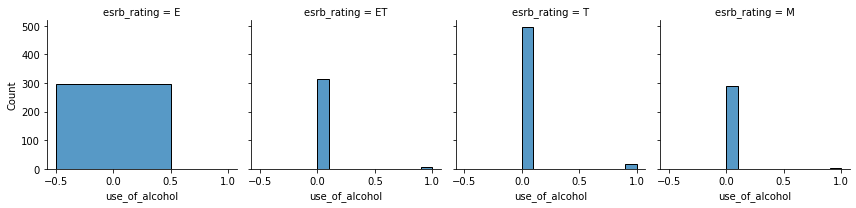

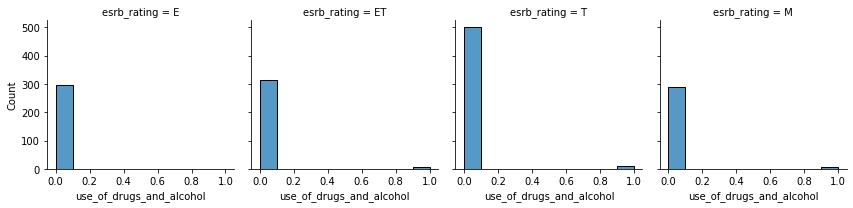

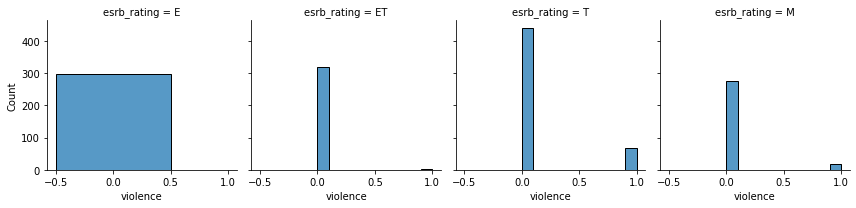

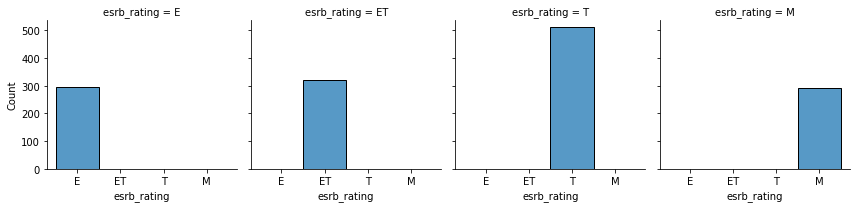

In [4]:
# First to see how many observations there are
print("The amount of observations: ", len(trainData))
print("\n")

# Lets see how many times Cartoon violence and Mild Cartoon Violence equal each other
print("The amount of times MCV occurs: ", len(trainData.loc[trainData['mild_cartoon_violence'] == 1]))
print("The amount of times CV occurs: ", len(trainData.loc[trainData['cartoon_violence'] == 1]))
print("The amount of times CV and MCV equal, CV = 1: ", len(trainData.loc[(trainData['cartoon_violence'] == trainData['mild_cartoon_violence']) & (trainData['cartoon_violence'] == 1)]))
print("The amount of times CV and MCV equal, MCV = 1: ", len(trainData.loc[(trainData['cartoon_violence'] == trainData['mild_cartoon_violence']) & (trainData['mild_cartoon_violence'] == 1)]))
print("\n")

# how many times strong language interacts with language; interesting that the column name is spelled incorrectly
print("Amount of time language occurs: ", len(trainData.loc[trainData['language'] == 1]))
print("Amount of time language occurs: ", len(trainData.loc[trainData['strong_janguage'] == 1]))
print("The amount of times SL equals L, L = 1: ", len(trainData.loc[(trainData['strong_janguage'] == trainData['language']) & trainData['language'] == 1]))
print("The amount of times SL equals L, SL = 1: ", len(trainData.loc[(trainData['strong_janguage'] == trainData['language']) & trainData['strong_janguage'] == 1]))
print("\n")

# alcohol_reference = use of alcohol
print("Amount of times theres a reference to alcohol: ", len(trainData.loc[trainData['alcohol_reference'] == 1]))
print("Amount of times theres a use of alcohol: ", len(trainData.loc[trainData['use_of_alcohol'] == 1]))
print("The amount of times a reference to alcohol equals the use of alcohol", len(trainData.loc[(trainData['alcohol_reference'] == trainData['use_of_alcohol']) & trainData['alcohol_reference'] == 1]))
print("\n")

# how many times no descriptors applies
print("Amount of times no descriptors occurs: ", len(trainData.loc[trainData['no_descriptors'] == 1]))
print("\n")

# how many times nudity and partial nudity occur
print("Amount of times nudity occurs: ", len(trainData.loc[trainData['nudity'] == 1]))
print("Amount of times partial nudity occurs: ", len(trainData.loc[trainData['partial_nudity'] == 1]))
print("Amount of time nudity occurs with partial nudity: ", len(trainData.loc[(trainData['nudity'] == trainData['partial_nudity']) & trainData['nudity'] == 1]))
print("\n")

# mild blood and blood
print("Amount of times theres blood: ", len(trainData.loc[trainData['blood'] == 1]))
print("Amount of times theres mild blood: ", len(trainData.loc[trainData['mild_blood'] == 1]))
print("The amount of times a reference to alcohol equals the use of alcohol", len(trainData.loc[(trainData['blood'] == trainData['mild_blood']) & trainData['blood'] == 1]))
print("\n")

titleUnique = trainData['title'].unique()
print("Amount of unique game titles: ", titleUnique.shape)


for x in trainData.drop(['id','title','console'], axis=1):
    g = sns.FacetGrid(trainData.drop(['id','title','console'], axis=1), col='esrb_rating')
    g.map(sns.histplot, x)
    plt.show()



Well, this is pretty odd. By reading the documentation on the dataset, or even simply reading the names of the categories, one might interpret that there would be a lot of overlap in terms of how these game titles are scored. However, there is a lot of *inconsistancy* that I've discovered throughout looking through these sets. Some of these categories have extremely low observations associated with them so are they even worth using as a feature for my models? Also some of these columns should intuitively overlap, like blood and mild blood. If there's blood in the game, mild blood should also be in the game, however, not all observations are reported this way, so it's likely that there are tons of different people rating games, and they all interpret the intructions differently on how to handle multiple overlapping categories. This leads me to believe perhaps I should try using different datasets, one where I attempt to group the categories, and one without.

Regardless I think I will also make the `esrb_rating` a ordinal category instead of nominal in order to promote these models to interpret it differently.

In [5]:
trainData.loc[trainData['esrb_rating'] == 'E', 'esrb_rating'] = 1
trainData.loc[trainData['esrb_rating'] == 'ET', 'esrb_rating'] = 2
trainData.loc[trainData['esrb_rating'] == 'T', 'esrb_rating'] = 3
trainData.loc[trainData['esrb_rating'] == 'M', 'esrb_rating'] = 4

trainData.head(20)

,id,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,474,Road to Ballhalla,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,475,RollerCoaster Legends II: Thor's Hammer,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,476,Island Time,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,477,Bridge Constructor Portal,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,478,Secret of Mana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,479,Shikhondo: Soul Eater,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,3
6,480,My Universe - Cooking Star Restaurant,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,481,Dark Devotion,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,482,SEUM: Speedrunners From Hell,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,4
9,483,Penguin Wars,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Okay so now our target vector is ordinal in nature.

I think I've decided that I will eliminate individual observations that are less than 5 total in every category as those could possibly be errors, as not consider console or no descriptors as a feature since they don't seem to be reliable data points in any sense, or at least their documentation leads me to believe they are non-helpful.

In [6]:
eRatedCols = []
etRatedCols = []
tRatedCols = []
mRatedCols = []

# finding which columns have values in E with less than 5 observations total
for x in trainData.drop(['id','title','console'], axis=1):
    if (len(trainData.loc[(trainData[x] == 1) & (trainData['esrb_rating'] == 1)]) < 5):
        #print("The amount of observations for " + x + " with a rating of E is less than 5")
        eRatedCols.append(x)

# finding which columns have values in ET with less than 5 observations
for x in trainData.drop(['id','title','console'], axis=1):
    if (len(trainData.loc[(trainData[x] == 1) & (trainData['esrb_rating'] == 2)]) < 5):
        #print("The amount of observations for " + x + " with a rating of ET is less than 5")
        etRatedCols.append(x)
        
# finding which columns have values in T with less than 5 observations
for x in trainData.drop(['id','title','console'], axis=1):
    if (len(trainData.loc[(trainData[x] == 1) & (trainData['esrb_rating'] == 3)]) < 5):
        #print("The amount of observations for " + x + " with a rating of T is less than 5")
        tRatedCols.append(x)
        
# finding which columns have values in M with less than 5 observations
for x in trainData.drop(['id','title','console'], axis=1):
    if (len(trainData.loc[(trainData[x] == 1) & (trainData['esrb_rating'] == 4)]) < 5):
        #print("The amount of observations for " + x + " with a rating of M is less than 5")
        mRatedCols.append(x)

# dropping those observations
for x in eRatedCols:
    trainData.drop(trainData[(trainData[x] == 1) & (trainData['esrb_rating'] == 1)].index, inplace=True)
    
for x in etRatedCols:
    trainData.drop(trainData[(trainData[x] == 1) & (trainData['esrb_rating'] == 2)].index, inplace=True)
    
for x in tRatedCols:
    trainData.drop(trainData[(trainData[x] == 1) & (trainData['esrb_rating'] == 3)].index, inplace=True)
    
for x in mRatedCols:
    trainData.drop(trainData[(trainData[x] == 1) & (trainData['esrb_rating'] == 4)].index, inplace=True)
    

print(len(trainData))

1392


So it looks like I didn't erase that much data so I'm hoping I just removed a few outliers from the dataset here. I'm thinking that with decision trees, having these outliers erased could drastically improve my sets here. We shall see!

---

#### Splitting data set for training purposes

In [7]:
from sklearn.model_selection import train_test_split

features = []
for x in trainData.drop(['id', 'title', 'console', 'no_descriptors', 'esrb_rating'], axis=1):
    features.append(x)
    
X = pd.get_dummies(trainData[features])
y = (trainData['esrb_rating'])
y=y.astype('int')
evalData = pd.get_dummies(testData[features]) 

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3)
print(type(yTrain))


<class 'pandas.core.series.Series'>


# Building Models

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
# parameter grids for each model
lrParams = {    
    'C': [0.001,0.01,0.1,1,10,100,1000]    
}

svcParams = {
    'C': [0.001,0.01,0.1,1,10,100,1000]    
}

dtParams = {
    'max_depth': np.arange(1,21),
    'min_samples_leaf': np.arange(1,21)
}

rfParams = {
    'max_depth': np.arange(1,21),
    'n_estimators': [100,200,300,400,500],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

knnParams = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19],
    'weights': ['uniform', 'distance']
}

In [10]:
# now it's time to perform the gridsearch , I will use individual code blocks for this so it doesn't take ten years
# this will be for the logristic regression algorithm
lrGrid = GridSearchCV(LogisticRegression(multi_class = 'multinomial', solver='newton-cg'), param_grid = lrParams, scoring='accuracy')
lrGrid.fit(xTrain, yTrain)
#lr = LogisticRegression()
#lr.fit(xTrain,yTrain)
print('The accuracy of the Logistic Regression Model is: ', lrGrid.best_score_)

The accuracy of the Logistic Regression Model is:  0.8501295268305578


In [11]:
# grid search for SVC
svcGrid = GridSearchCV(SVC(), param_grid = svcParams, scoring = 'accuracy')
svcGrid.fit(xTrain, yTrain)

print('The accuracy of the Support Vector Machine Classifier is: ', svcGrid.best_score_)

The accuracy of the Support Vector Machine Classifier is:  0.854221517314301


In [12]:
# grid search for Decision Tree
dtGrid = GridSearchCV(DecisionTreeClassifier(), param_grid = dtParams, scoring = 'accuracy')
dtGrid.fit(xTrain,yTrain)

print('The accuracy of the Decision Tree is: ', dtGrid.best_score_)

The accuracy of the Decision Tree is:  0.8419138250066084


In [13]:
# grid search for Random Forest
rfGrid = GridSearchCV(RandomForestClassifier(), param_grid = rfParams, scoring = 'accuracy')
rfGrid.fit(xTrain,yTrain)

print('The accuracy of the Random Forest is: ', rfGrid.best_score_)

The accuracy of the Random Forest is:  0.8501348136399681


In [14]:
# grid search for K Nearest Neighbors
knnGrid = GridSearchCV(KNeighborsClassifier(), param_grid = knnParams, scoring = 'accuracy')
knnGrid.fit(xTrain,yTrain)

print('The accuracy of the Nearest Neighbors model is: ', knnGrid.best_score_)

The accuracy of the Nearest Neighbors model is:  0.8326619085381971


---
# Predictions


In [15]:
from sklearn.metrics import accuracy_score

# predicting over the test split
lrPrediction = lrGrid.predict(xTest)
svcPrediction = svcGrid.predict(xTest)
dtPrediction = dtGrid.predict(xTest)
rfPrediction = rfGrid.predict(xTest)
knnPrediction = knnGrid.predict(xTest)

# printing accuracy
print('Lr accuracy: ', accuracy_score(yTest,lrPrediction))
print('SVC accuracy: ', accuracy_score(yTest,svcPrediction))
print('DT accuracy: ', accuracy_score(yTest,dtPrediction))
print('RF accuracy: ', accuracy_score(yTest,rfPrediction))
print('KNN accuracy: ', accuracy_score(yTest,knnPrediction))

# printing results
distLRDF = pd.DataFrame(lrGrid.cv_results_)
distLRDF.describe()

distSVCDF = pd.DataFrame(svcGrid.cv_results_)
distSVCDF.describe()

distDTDF = pd.DataFrame(dtGrid.cv_results_)
distDTDF.describe()

distRFDF = pd.DataFrame(rfGrid.cv_results_)
distRFDF.describe()

distKNNDF = pd.DataFrame(knnGrid.cv_results_)
distKNNDF.describe()

Lr accuracy:  0.8636363636363636
SVC accuracy:  0.8755980861244019
DT accuracy:  0.8660287081339713
RF accuracy:  0.8660287081339713
KNN accuracy:  0.8397129186602871


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.004590,0.000142,0.013297,0.000203,0.802564,0.791026,0.816667,0.797949,0.814948,0.804631,0.017338,10.450000
std,0.000127,0.000194,0.003307,0.000173,0.025856,0.034657,0.027130,0.021783,0.035116,0.024862,0.005505,5.862234
min,0.004463,0.000015,0.009019,0.000072,0.753846,0.743590,0.774359,0.743590,0.726804,0.760745,0.008541,1.000000
25%,0.004519,0.000054,0.010207,0.000130,0.782051,0.748718,0.798718,0.793590,0.807990,0.779803,0.012778,5.750000
50%,0.004554,0.000090,0.013049,0.000151,0.810256,0.802564,0.815385,0.805128,0.829897,0.808023,0.015765,10.500000
75%,0.004607,0.000120,0.016481,0.000238,0.816667,0.820513,0.842308,0.810256,0.835052,0.827018,0.021096,15.250000
max,0.004924,0.000708,0.017418,0.000882,0.841026,0.835897,0.851282,0.820513,0.850515,0.832662,0.027519,20.000000


Looks like our regression algorithm is going to be out best bet! Lets apply it to our evaluation set!

In [16]:
lrEvaluation = lrGrid.predict(pd.get_dummies(testData[features]))

output = pd.DataFrame({
    'id': testData['id'],
    'esrb_rating': lrEvaluation
})

temp = ['J', 'E', 'ET', 'T', 'M']
for x in range(1,5):
    output.loc[output['esrb_rating'] == x, 'esrb_rating'] = temp[x]
    
output.to_csv('submission.csv', index=False)
print(output.to_string())

      id esrb_rating
0      0           E
1      1           T
2      2          ET
3      3           E
4      4          ET
5      5           M
6      6           T
7      7           E
8      8          ET
9      9          ET
10    10          ET
11    11           T
12    12          ET
13    13           E
14    14           T
15    15           T
16    16           E
17    17           E
18    18           M
19    19           T
20    20          ET
21    21           T
22    22           T
23    23           M
24    24           E
25    25           E
26    26           T
27    27           M
28    28           M
29    29           T
30    30           T
31    31           E
32    32           T
33    33           T
34    34          ET
35    35           T
36    36           E
37    37           E
38    38           T
39    39           T
40    40           E
41    41           E
42    42           T
43    43          ET
44    44           T
45    45           T
46    46     